         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

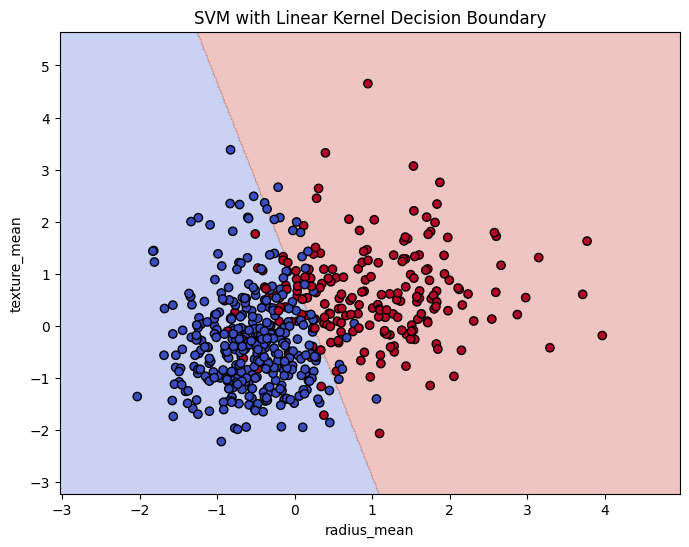

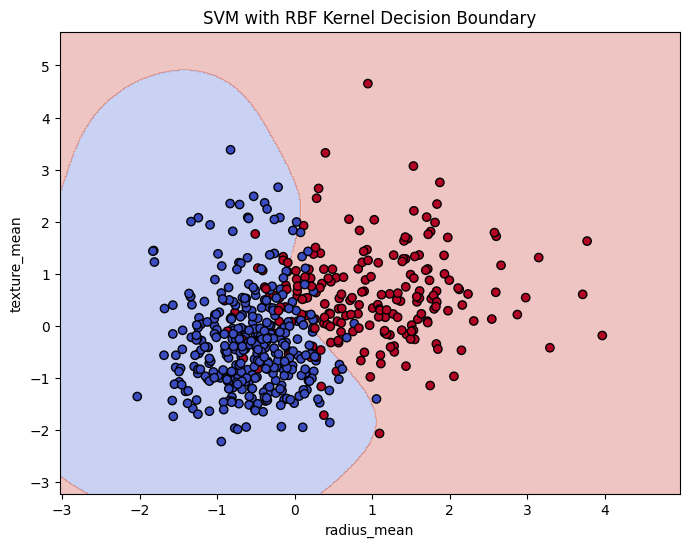

Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9032967032967034
Test accuracy with best parameters: 0.9035087719298246


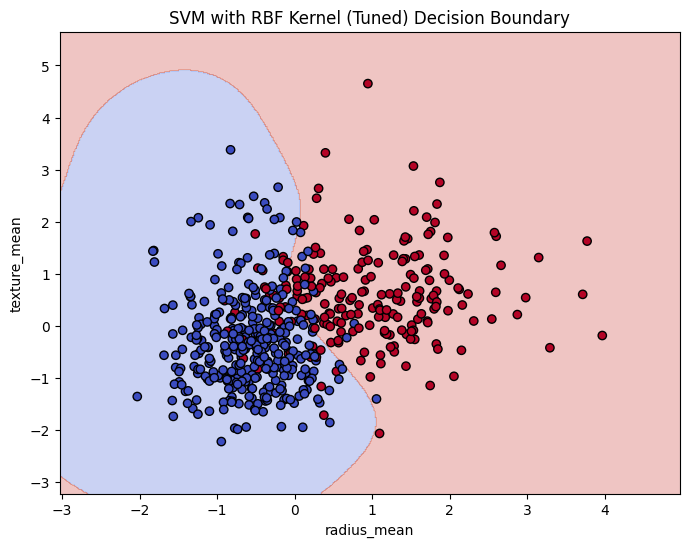

Cross-validation accuracy scores: [0.85087719 0.87719298 0.9122807  0.93859649 0.90265487]
Mean cross-validation accuracy: 0.8963204471355379


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

data_path = '/content/breast-cancer.csv'
df = pd.read_csv(data_path)

print(df.head())

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel Decision Boundary")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel Decision Boundary")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Test accuracy with best parameters:", accuracy_score(y_test, y_pred_best))

plot_decision_boundary(best_svm, X_scaled, y, "SVM with RBF Kernel (Tuned) Decision Boundary")

cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
